<a href="https://colab.research.google.com/github/almaprateek/retail_Sales_Prediction_rossmann/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

## **You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.** 

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **Exploration of Dataset**

In [1]:
#importing libraries 
import pandas as pd
import numpy as np


In [3]:
# let's mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Rossmann Stores Data.csv - historical data including Sales**

In [4]:
data1 = pd.read_csv('/content/drive/MyDrive/Retail sales prediction/Data _ Resources/Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**store.csv - supplemental information about the stores**

In [5]:
data2 = pd.read_csv('/content/drive/MyDrive/Retail sales prediction/Data _ Resources/store.csv')

In [6]:
for data in data1,data2 :
  data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

# **OBSERVATION** - Data 1 is free from null values and data 2 has significant null values , so we have to handle them accordingly. 

In [ ]:
data1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
data2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
# However , we know we have data of  1115 stores ,still et's cross check
data1.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
data1.Store.value_counts()

1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

* We see , we have data 1 has 1115 unique stores.

In [13]:
# Now its time to check no of unique stores in data 2
data2.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [14]:
data2.Store.value_counts()

1115    1
374     1
368     1
369     1
370     1
       ..
738     1
737     1
736     1
735     1
1       1
Name: Store, Length: 1115, dtype: int64

* We see , we have data 2 also has 1115 unique stores.

# As we have seen ,both datas have information of 1115 unique stores.
#So, it would be a good idea to join both the tables. 

In [15]:
# joining both the tables
joined_data = pd.merge(data1,data2,on='Store',how='inner')

In [16]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [17]:
# copying the joined table ,such that we are free to perform our experiments
sales_data=joined_data.copy()

In [18]:
sales_data.head( )

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [19]:
sales_data.tail( )

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


**First of all , Let's explore all the features of table and after that we will work on NaN value handling.**

## **Thought Process**

 * As we have already explored column Store ,We already know that we have data of 1115 stores.

**NOW, Let's explore DayofWeek column**

In [20]:
sales_data.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

* So, we have data of 7 days a week.




In [21]:
import matplotlib.pyplot as plt 
day_of_week=pd.DataFrame(sales_data.groupby('DayOfWeek').mean())


In [ ]:
day_of_week.head()

,Store,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
DayOfWeek,,,,,,,,,,,,
1,558.427195,7809.044510,813.065791,0.950459,0.537276,0.235335,5429.907450,7.222884,2008.690085,0.500643,23.271385,2011.752850
2,558.437830,7005.244467,760.984615,0.988309,0.532596,0.251229,5430.739645,7.222788,2008.690728,0.500281,23.260837,2011.752501
3,558.440778,6555.884138,721.639666,0.974400,0.532592,0.237778,5430.702472,7.222826,2008.690761,0.500278,23.260837,2011.752501
4,558.423930,6247.575913,697.541486,0.923199,0.531935,0.238246,5429.716291,7.222898,2008.689923,0.500730,23.273919,2011.752934
5,558.423930,6723.274305,743.150742,0.950598,0.531935,0.248449,5429.716291,7.222898,2008.689923,0.500730,23.273919,2011.752934


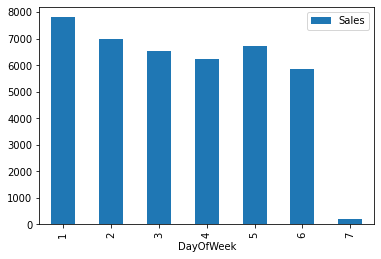

In [ ]:
day_of_week.plot.bar(y='Sales' )

## **Thought Process**

## **Handling Missing Data**


From the entry totals above, many of the features are missing a significant amount of data. Explore these columns further to determine the best approach for each.

In [22]:
# Missing Value Count Function
def show_missing():
    missing = sales_data.columns[sales_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(sales_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(sales_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(sales_data)*100,2))

Missing Data Count
PromoInterval                508031
Promo2SinceYear              508031
Promo2SinceWeek              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
CompetitionDistance            2642
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
PromoInterval                49.94
Promo2SinceYear              49.94
Promo2SinceWeek              49.94
CompetitionOpenSinceYear     31.79
CompetitionOpenSinceMonth    31.79
CompetitionDistance           0.26
dtype: float64


Missing value is below 50% .So,we will look into ways to fill those places.

**The no. of missing values is same in PromoInterval,Promo2SinceYear and Promo2SinceWeek column. It seems like data have null values where value of promo2 is 0 and it is quite obvious too.Let's cross check our hypothesis.**               



In [ ]:
print(sales_data[(sales_data['PromoInterval'].isnull())|
                 (sales_data['Promo2SinceYear'].isnull())| 
                 (sales_data['Promo2SinceWeek'].isnull())]
                  [['Promo2','PromoInterval','Promo2SinceYear','Promo2SinceWeek']])

         Promo2 PromoInterval  Promo2SinceYear  Promo2SinceWeek
0             0          None              NaN              NaN
1             0          None              NaN              NaN
2             0          None              NaN              NaN
3             0          None              NaN              NaN
4             0          None              NaN              NaN
...         ...           ...              ...              ...
1016262       0          None              NaN              NaN
1016263       0          None              NaN              NaN
1016264       0          None              NaN              NaN
1016265       0          None              NaN              NaN
1016266       0          None              NaN              NaN

[508031 rows x 4 columns]


so,wherever promo2 = 0 , we will fill NAN value as

>PromoInterval =  None

>Promo2SinceYear = 0

>Promo2SinceWeek = 0

In [23]:
# Function to impute missing values
def feat_impute(column, value):
    sales_data.loc[sales_data[column].isnull(),column] = value

In [25]:
# Impute nulls to None or 0  ,since data type of PromoInterval column is object type whereas rest are integer type.
for cols in ('PromoInterval','Promo2SinceYear','Promo2SinceWeek'):
    if sales_data[cols].dtype ==np.object:
        cols = feat_impute(cols, 'None')
    else:
        cols = feat_impute(cols, 0)

In [26]:
# checking whether null values are imputed or not.
print(sales_data[['PromoInterval','Promo2SinceYear','Promo2SinceWeek']].isnull().sum())

PromoInterval      0
Promo2SinceYear    0
Promo2SinceWeek    0
dtype: int64


**Thus, null values in these 3 columns are successfully treated . Now, we will work on the null values in these 2 colums :- (CompetitionOpenSinceYear,CompetitionOpenSinceMonth) , since no. of null values are same in these 2 columns.**

In [27]:
sales_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [33]:
print(sales_data[(sales_data['CompetitionOpenSinceMonth'].isnull())| 
                 (sales_data['CompetitionOpenSinceYear'].isnull())]
                  [['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']])


         CompetitionOpenSinceMonth  CompetitionOpenSinceYear
10362                          NaN                       NaN
10363                          NaN                       NaN
10364                          NaN                       NaN
10365                          NaN                       NaN
10366                          NaN                       NaN
...                            ...                       ...
1017204                        NaN                       NaN
1017205                        NaN                       NaN
1017206                        NaN                       NaN
1017207                        NaN                       NaN
1017208                        NaN                       NaN

[323348 rows x 2 columns]


### **It can be clearly observed that CompetitionOpenSinceMonth and CompetitionOpenSinceYear are having null values simultaneously.Now,Let's see whether these null values have any relation with other columns , otherwise we will fill those null values with the respective mean/median/mode values of the respective columns.**


In [38]:
print(sales_data[(sales_data['CompetitionOpenSinceMonth'].isnull())| 
                 (sales_data['CompetitionOpenSinceYear'].isnull())])

         Store  DayOfWeek  ... Promo2SinceYear     PromoInterval
10362       12          5  ...          2010.0   Jan,Apr,Jul,Oct
10363       12          4  ...          2010.0   Jan,Apr,Jul,Oct
10364       12          3  ...          2010.0   Jan,Apr,Jul,Oct
10365       12          2  ...          2010.0   Jan,Apr,Jul,Oct
10366       12          1  ...          2010.0   Jan,Apr,Jul,Oct
...        ...        ...  ...             ...               ...
1017204   1115          6  ...          2012.0  Mar,Jun,Sept,Dec
1017205   1115          5  ...          2012.0  Mar,Jun,Sept,Dec
1017206   1115          4  ...          2012.0  Mar,Jun,Sept,Dec
1017207   1115          3  ...          2012.0  Mar,Jun,Sept,Dec
1017208   1115          2  ...          2012.0  Mar,Jun,Sept,Dec

[323348 rows x 18 columns]


In [39]:
print(sales_data[(sales_data['CompetitionOpenSinceMonth'].isnull())| 
                 (sales_data['CompetitionOpenSinceYear'].isnull())]
                  [['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']])

         CompetitionDistance  ...  CompetitionOpenSinceYear
10362                 1070.0  ...                       NaN
10363                 1070.0  ...                       NaN
10364                 1070.0  ...                       NaN
10365                 1070.0  ...                       NaN
10366                 1070.0  ...                       NaN
...                      ...  ...                       ...
1017204               5350.0  ...                       NaN
1017205               5350.0  ...                       NaN
1017206               5350.0  ...                       NaN
1017207               5350.0  ...                       NaN
1017208               5350.0  ...                       NaN

[323348 rows x 3 columns]
